In [ ]:
import numpy as np 
import pandas as pd 
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')
import os

data=pd.read_csv('dataa.csv')
# Any results you write to the current directory are saved as output.

In [ ]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [ ]:
data.head(2)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN


In [ ]:
data.shape

(569, 33)

In [ ]:
data=data.drop(['id','Unnamed: 32'], axis=1)
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [ ]:
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
data.isnull().any()

diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_worst             False
fractal_di

No. of malignant cases:  357
No. of benign cases:  212


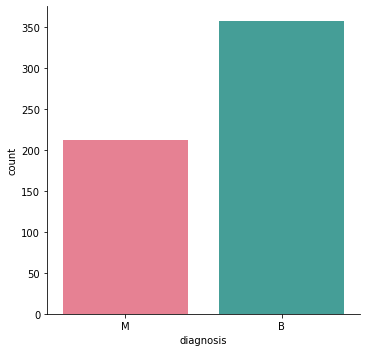

In [ ]:
M,B=data['diagnosis'].value_counts()
print('No. of malignant cases: ' ,M)
print('No. of benign cases: ' ,B)
sns.catplot(x='diagnosis',kind='count',data=data, palette="husl")

In [ ]:
M=data.loc[data['diagnosis']=='M',:]
M.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
B=data.loc[data['diagnosis']=='B',:]
B.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
19,B,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,0.05766,0.2699,0.7886,2.058,23.560,0.008462,0.014600,0.02387,0.013150,0.01980,0.002300,15.110,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259
20,B,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,0.06811,0.1852,0.7477,1.383,14.670,0.004097,0.018980,0.01698,0.006490,0.01678,0.002425,14.500,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183
21,B,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,0.06905,0.2773,0.9768,1.909,15.700,0.009606,0.014320,0.01985,0.014210,0.02027,0.002968,10.230,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773
37,B,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,0.05863,0.1839,2.3420,1.170,14.160,0.004352,0.004899,0.01343,0.011640,0.02671,0.001777,13.300,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169
46,B,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,0.1563,0.9567,1.094,8.205,0.008968,0.016460,0.01588,0.005917,0.02574,0.002582,8.964,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409


In [ ]:
M=M.drop(['diagnosis'],axis=1)
B=B.drop(['diagnosis'],axis=1)

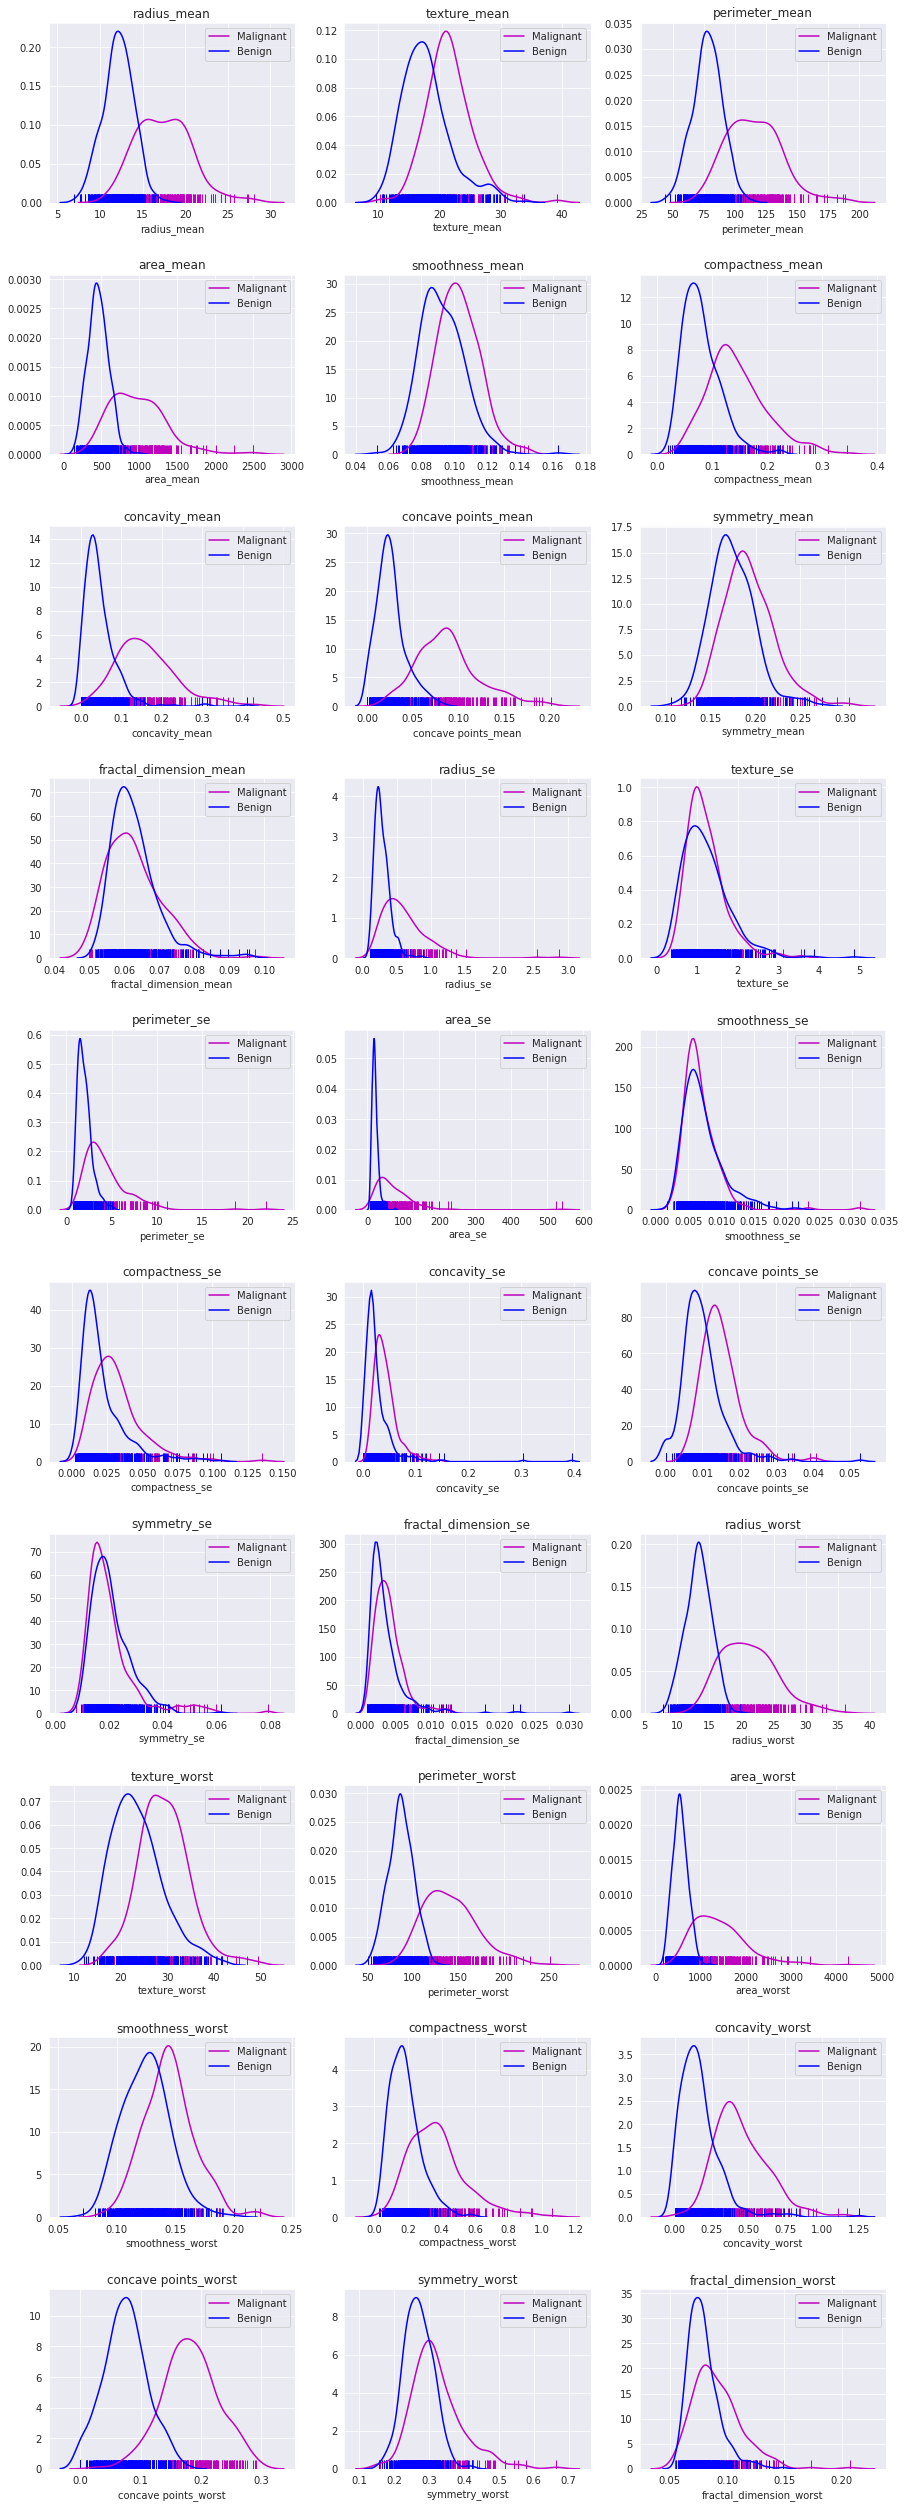

In [ ]:
plt.subplots(figsize=(15,45))
sns.set_style('darkgrid')
plt.subplots_adjust (hspace=0.4, wspace=0.2)
i=0
for col in M.columns:
    i+=1
    plt.subplot(10,3,i)
    # first (0th) column of M is diagnosis, non-numerical
    sns.distplot(M[col],color='m',label='Malignant',hist=False, rug=True)
    sns.distplot(B[col],color='b',label='Benign',hist=False, rug=True)
    plt.legend(loc='right-upper')
    plt.title(col)

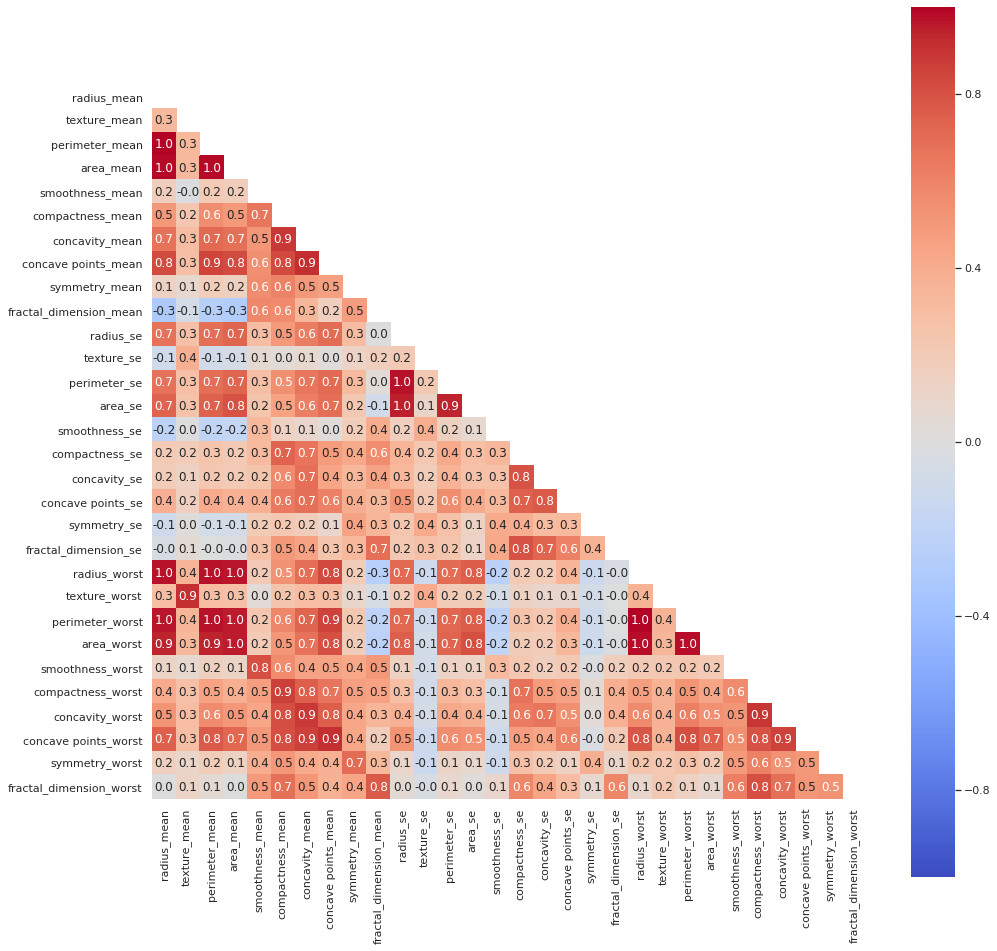

In [ ]:
sns.set(style="white")
fig,ax=plt.subplots(figsize=(16,16))
corr=data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
#cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr,vmin=-1,vmax=1,fmt = ".1f",annot=True,cmap="coolwarm", mask=mask, square=True)

In [ ]:
data['diagnosis']=data['diagnosis'].map({'M':1,'B':0})
data=data.drop(['area_mean', 'perimeter_mean', 'radius_worst', 'area_worst', 'perimeter_worst','texture_worst','concavity_mean','perimeter_se', 'area_se'],axis=1)
print(data.shape)

(569, 22)


In [ ]:
y=data['diagnosis'].values
X=data.drop(['diagnosis'],axis=1).values

X_train,X_test,y_train, y_test=train_test_split(X,y,test_size=0.3, random_state=8)

(0, 22)

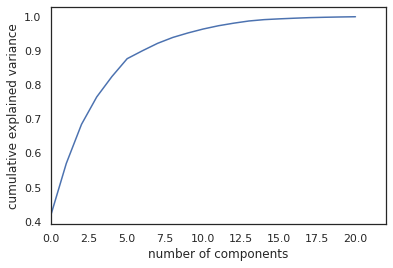

In [ ]:
scaler=StandardScaler()
X_train_std=scaler.fit_transform(X_train)
X_test_std=scaler.transform(X_test)
pca=PCA().fit(X_train_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.xlim(0,22,2)

In [ ]:
pca=PCA(n_components=10)
pca.fit(X_train_std)
X_train_pca=pca.transform(X_train_std)
X_test_pca=pca.transform(X_test_std)
print(X_train_pca.shape)
print(X_test_pca.shape)

(398, 10)
(171, 10)


In [ ]:
X_train_pca.columns


In [ ]:
logreg=LogisticRegression(random_state=1)
score = np.mean(cross_val_score(logreg,  X_train_pca, y_train, scoring='accuracy'))
p_scores = np.mean(cross_val_score(logreg,  X_train_pca, y_train, scoring='precision'))
r_scores = np.mean(cross_val_score(logreg,  X_train_pca, y_train, scoring='recall'))
print("Accuracy: %s" % '{:.2%}'.format(score))
print ('Precision : %s' %'{:.2%}' .format(p_scores))
print ('Recall score: %s' % '{:.2%}'.format(r_scores))

Accuracy: 97.49%
Precision : 97.89%
Recall score: 95.21%


In [ ]:
knn=KNeighborsClassifier()
scores = np.mean(cross_val_score(knn,  X_train_pca, y_train, scoring='accuracy'))
p_scores = np.mean(cross_val_score(knn,  X_train_pca, y_train, scoring='precision'))
r_scores = np.mean(cross_val_score(knn,  X_train_pca, y_train, scoring='recall'))
print("Accuracy: %s" % '{:.2%}'.format(score))
print ('Precision : %s' %'{:.2%}' .format(p_scores))
print ('Recall score: %s' % '{:.2%}'.format(r_scores))

X1_train,X1_test,y1_train,y1_test= train_test_split(X_train_pca, y_train,test_size=0.3,random_state=21)
knn.fit(X1_train,y1_train)
y_pred=knn.predict(X1_test)
con=confusion_matrix(y1_test,y_pred)
print('Confusion matrix:')
print(con)

Accuracy: 97.49%
Precision : 98.48%
Recall score: 89.70%
Confusion matrix:
[[72  0]
 [ 4 44]]


In [ ]:
knn=KNeighborsClassifier()
param_grid = {"n_neighbors": np.arange(1,50)}
knn_cv = GridSearchCV(estimator = knn, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 0)
knn_cv.fit( X_train_pca, y_train)
print(knn_cv.best_params_)

{'n_neighbors': 9}


In [ ]:
knn_cv=KNeighborsClassifier(n_neighbors= 9)
score_knn_cv = np.mean(cross_val_score(knn_cv,  X_test_pca, y_test, scoring='accuracy'))
p_score_knn_cv = np.mean(cross_val_score(knn_cv,  X_test_pca, y_test, scoring='precision'))
r_score_knn_cv = np.mean(cross_val_score(knn_cv,  X_test_pca, y_test, scoring='recall'))
print("Accuracy for knn_cv: %s" % '{:.2%}'.format(score_knn_cv))
print ('Precision for knn_cv: %s' %'{:.2%}' .format(p_score_knn_cv))
print ('Recall score for knn_cv: %s' % '{:.2%}'.format(r_score_knn_cv))

score_knn = np.mean(cross_val_score(knn,  X_test_pca, y_test, scoring='accuracy'))
p_score_knn= np.mean(cross_val_score(knn,  X_test_pca, y_test, scoring='precision'))
r_score_knn = np.mean(cross_val_score(knn,  X_test_pca, y_test, scoring='recall'))
print("Accuracy for knn: %s" % '{:.2%}'.format(score_knn))
print ('Precision for knn: %s' %'{:.2%}' .format(p_score_knn))
print ('Recall score for knn: %s' % '{:.2%}'.format(r_score_knn))

Accuracy for knn_cv: 91.23%
Precision for knn_cv: 94.63%
Recall score for knn_cv: 81.82%
Accuracy for knn: 90.06%
Precision for knn: 90.19%
Recall score for knn: 83.33%


In [ ]:
svc=SVC(random_state=1)
scores_svc = np.mean(cross_val_score(svc,  X_train_pca, y_train, scoring='accuracy'))
p_score_svc = np.mean(cross_val_score(svc,  X_test_pca, y_test, scoring='precision'))
r_score_svc = np.mean(cross_val_score(svc,  X_test_pca, y_test, scoring='recall'))
print("Accuracy for svc: %s" % '{:.2%}'.format(scores_svc))
print ('Precision for svc: %s' %'{:.2%}' .format(p_score_svc))
print ('Recall score for svc: %s' % '{:.2%}'.format(r_score_svc))

Accuracy for svc: 96.23%
Precision for svc: 91.88%
Recall score for svc: 93.94%


In [ ]:
svc=SVC(random_state=1)
param_grid = {"C": [0.001,0.1,1,10], 'degree':[1,3,10]}
svc_cv=GridSearchCV(svc,param_grid=param_grid,cv = 3, n_jobs = -1, verbose = 0)
svc_cv.fit(X_train_pca, y_train)
svc_cv.best_params_

{'C': 1, 'degree': 1}

In [ ]:
svc_cv= SVC(random_state=1, C=1, degree=1)
score_svc_cv = np.mean(cross_val_score(svc_cv,  X_test_pca, y_test, scoring='accuracy'))
p_score_svc_cv = np.mean(cross_val_score(svc_cv,  X_test_pca, y_test, scoring='precision'))
r_score_svc_cv = np.mean(cross_val_score(svc_cv,  X_test_pca, y_test, scoring='recall'))
print("Accuracy for svc_cv: %s" % '{:.2%}'.format(score_svc_cv))
print ('Precision for svc_cv: %s' %'{:.2%}' .format(p_score_svc_cv))
print ('Recall score for svc_cv: %s' % '{:.2%}'.format(r_score_svc_cv))

score_svc = np.mean(cross_val_score(svc,  X_test_pca, y_test, scoring='accuracy'))
p_score_svc= np.mean(cross_val_score(svc,  X_test_pca, y_test, scoring='precision'))
r_score_svc = np.mean(cross_val_score(svc,  X_test_pca, y_test, scoring='recall'))
print("Accuracy for svc: %s" % '{:.2%}'.format(score_svc))
print ('Precision for svc: %s' %'{:.2%}' .format(p_score_svc))
print ('Recall score for svc: %s' % '{:.2%}'.format(r_score_svc))

Accuracy for svc_cv: 94.15%
Precision for svc_cv: 91.88%
Recall score for svc_cv: 93.94%
Accuracy for svc: 94.15%
Precision for svc: 91.88%
Recall score for svc: 93.94%


In [ ]:
dt=DecisionTreeClassifier(random_state=7)
score_dt = np.mean(cross_val_score(dt,  X_train_pca, y_train, scoring='accuracy'))
p_score_dt = np.mean(cross_val_score(dt,  X_train_pca, y_train, scoring='precision'))
r_score_dt = np.mean(cross_val_score(dt,  X_train_pca, y_train, scoring='recall'))
print("Accuracy for Decision Tree: %s" % '{:.2%}'.format(score_dt))
print ('Precision Decision Tree: %s' %'{:.2%}' .format(p_score_dt))
print ('Recall score Decision Tree: %s' % '{:.2%}'.format(r_score_dt))

Accuracy for Decision Tree: 90.45%
Precision Decision Tree: 87.14%
Recall score Decision Tree: 87.00%


In [ ]:
rf=RandomForestClassifier(random_state=21)
score_rf = np.mean(cross_val_score(rf,  X_train_pca, y_train, scoring='accuracy'))
p_score_rf = np.mean(cross_val_score(rf,  X_train_pca, y_train, scoring='precision'))
r_score_rf = np.mean(cross_val_score(rf,  X_train_pca, y_train, scoring='recall'))
print("Accuracy for RandomForest: %s" % '{:.2%}'.format(score_rf))
print ('Precision RandomForest:: %s' %'{:.2%}' .format(p_score_rf))
print ('Recall score RandomForest:: %s' % '{:.2%}'.format(r_score_rf))

Accuracy for RandomForest: 91.71%
Precision RandomForest:: 93.86%
Recall score RandomForest:: 82.88%


In [ ]:
param_grid = {'max_depth': [80, 90, 100, 110],
              'max_features': [2, 3],
              'min_samples_leaf': [3, 4, 5],
              'min_samples_split': [8, 10, 12],
              'n_estimators': [100, 200, 300, 1000]}
# Create a basic model
rf = RandomForestClassifier(random_state=21)
# Instantiate the grid search model
rf_cv = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 0)
rf_cv.fit(X_train_pca, y_train)
print(rf_cv.best_params_)
score=rf_cv.best_score_
print("Accuracy: %s" % '{:.2%}'.format(score))

{'max_depth': 80, 'max_features': 3, 'min_samples_leaf': 5, 'min_samples_split': 8, 'n_estimators': 100}
Accuracy: 94.22%


In [ ]:
rf_cv=RandomForestClassifier(random_state=21,max_depth= 80, max_features= 3,min_samples_leaf= 5, 
                          min_samples_split=8,n_estimators= 100)
score_rf_cv = np.mean(cross_val_score(rf_cv,  X_test_pca, y_test, scoring='accuracy'))
print("Accuracy for rf_cv: %s" % '{:.2%}'.format(score_rf_cv))

score_rf = np.mean(cross_val_score(rf,  X_test_pca, y_test, scoring='accuracy'))
print("Accuracy for rf: %s" % '{:.2%}'.format(score_rf))

Accuracy for rf_cv: 88.89%
Accuracy for rf: 88.30%


In [ ]:
logreg=LogisticRegression(random_state=1)
knn_cv=KNeighborsClassifier(n_neighbors= 9)
svc=SVC(random_state=1)
dt=DecisionTreeClassifier(random_state=7)
rf_cv=RandomForestClassifier(random_state=21,max_depth= 80, max_features= 3,min_samples_leaf= 5, 
                          min_samples_split=8,n_estimators= 100)

from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators=[('logreg',logreg),('knn_cv', knn_cv), ('rf_cv', rf_cv), ('dt',dt), ('svc', svc)], voting='hard')
score = np.mean(cross_val_score(voting_clf,  X_train_pca, y_train, scoring='accuracy'))
print("Accuracy : %s" % '{:.2%}'.format(score))

Accuracy : 97.23%


In [ ]:
svc=SVC(random_state=1,probability=True)

voting_clf = VotingClassifier(estimators=[('logreg',logreg), ('rf_cv', rf_cv),  ('svc', svc)], voting='soft')
score = np.mean(cross_val_score(voting_clf,  X_train_pca, y_train, scoring='accuracy'))
p_score = np.mean(cross_val_score(voting_clf,  X_train_pca, y_train, scoring='precision'))
r_score = np.mean(cross_val_score(voting_clf,  X_train_pca, y_train, scoring='recall'))
print("Accuracy : %s" % '{:.2%}'.format(score))
print ('Precision : %s' %'{:.2%}' .format(p_score))
print ('Recall :: %s' % '{:.2%}'.format(r_score))

Accuracy : 98.24%
Precision : 99.29%
Recall :: 95.89%
